In [49]:
import pandas as pd
#settings :
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
from scipy import stats
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.metrics as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier


coding help from ChatGPT and Moodle course materials

In [50]:
data = pd.read_csv('world-data-2023.csv')
data.head(5)

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,AFN,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.40%,ALL,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.00%,DZD,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,NaN,EUR,1.27,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,Andorra la Vella,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.10%,AOA,5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,Luanda,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [3]:
# Display information about the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [4]:
# Descriptive statistics of the data
print(data.describe().T)

                          count        mean         std         min        25%         50%         75%          max
Birth Rate                189.0   20.214974    9.945774    5.900000  11.300000   17.950000   28.750000    46.080000
Calling Code              194.0  360.546392  323.236419    1.000000  82.500000  255.500000  506.750000  1876.000000
Fertility Rate            188.0    2.698138    1.282267    0.980000   1.705000    2.245000    3.597500     6.910000
Infant mortality          189.0   21.332804   19.548058    1.400000   6.000000   14.000000   32.700000    84.500000
Life expectancy           187.0   72.279679    7.483661   52.800000  67.000000   73.200000   77.500000    85.400000
Maternal mortality ratio  181.0  160.392265  233.502024    2.000000  13.000000   53.000000  186.000000  1150.000000
Physicians per thousand   188.0    1.839840    1.684261    0.010000   0.332500    1.460000    2.935000     8.420000
Latitude                  194.0   19.092351   23.961779  -40.900557   4.

In [5]:
# Check for missing values
print(data.isna().sum())

Country                                       0
Density\n(P/Km2)                              0
Abbreviation                                  7
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Calling Code                                  1
Capital/Major City                            3
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Currency-Code                                15
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Infant mortality                              6
Largest city                            

In [6]:
# Drop rows with any missing values from the entire dataset
data.dropna(inplace=True)

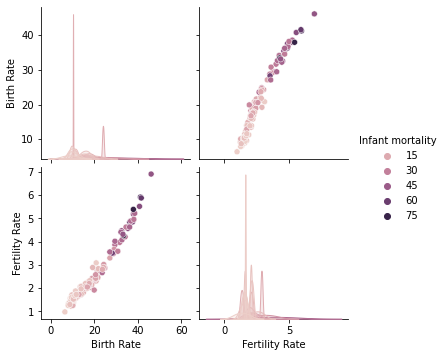

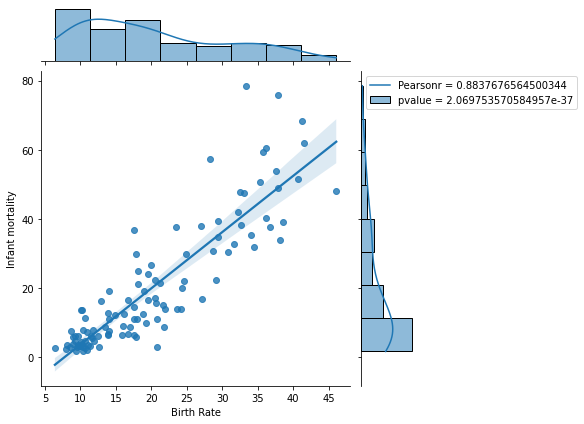

In [7]:
# Pairplot visualization
sns.pairplot(data[['Birth Rate', 'Fertility Rate', 'Infant mortality']], hue='Infant mortality')

test_corr,  p = stats.pearsonr(data['Birth Rate'], data['Infant mortality'])
test_corr

g = sns.jointplot(data=data, x='Birth Rate', y='Infant mortality', kind='reg')
plt.legend(("Pearsonr = {}".format(test_corr), ("pvalue = {}".format(p))))


# Regression task

In [8]:
# Preprocess the data for regression task
train_regression = data.drop('Infant mortality', axis=1)
y_regression = data['Infant mortality']

In [9]:
# One-hot encode the categorical columns
train_regression = pd.get_dummies(train_regression)

In [10]:
# Split the data for regression task
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(train_regression, y_regression, test_size=0.3)

models_regression = [
    ('model1', GradientBoostingRegressor(max_depth=4, min_samples_leaf=5)),
    ('model2', GradientBoostingRegressor(max_depth=7, min_samples_leaf=7)),
    ('model3', GradientBoostingRegressor(max_depth=10, min_samples_leaf=8)),
    ('model4', GradientBoostingRegressor(max_depth=5, min_samples_leaf=4))
]

In [11]:
# Create VotingRegressor by passing the list of tuples
ensemble_regression = VotingRegressor(estimators=models_regression)


In [12]:
# Fit the VotingRegressor
ensemble_regression.fit(X_train_regression, y_train_regression)


VotingRegressor(estimators=[('model1',
                             GradientBoostingRegressor(max_depth=4,
                                                       min_samples_leaf=5)),
                            ('model2',
                             GradientBoostingRegressor(max_depth=7,
                                                       min_samples_leaf=7)),
                            ('model3',
                             GradientBoostingRegressor(max_depth=10,
                                                       min_samples_leaf=8)),
                            ('model4',
                             GradientBoostingRegressor(max_depth=5,
                                                       min_samples_leaf=4))])

In [13]:
# Make predictions using the VotingRegressor
ypreds_regression = [model.predict(X_test_regression) for model in ensemble_regression.estimators_]


In [14]:
# Compute the final ensemble prediction by averaging the predictions from individual models
ypred_regression_ensemble = np.mean(ypreds_regression, axis=0)

print("Voting Regressor Evaluation:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test_regression, ypred_regression_ensemble), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test_regression, ypred_regression_ensemble), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test_regression, ypred_regression_ensemble), 2))
print("Explained variance score =", round(sm.explained_variance_score(y_test_regression, ypred_regression_ensemble), 2))
print("R2 score =", round(sm.r2_score(y_test_regression, ypred_regression_ensemble), 2))


Voting Regressor Evaluation:
Mean absolute error = 5.1
Mean squared error = 56.88
Median absolute error = 2.78
Explained variance score = 0.86
R2 score = 0.86


In [15]:
# Individual Model Evaluation (GradientBoostingRegressor)
model_regression = GradientBoostingRegressor(max_depth=4, min_samples_leaf=5)
model_fit_regression = model_regression.fit(X_train_regression, y_train_regression)
y_pred_regression = model_fit_regression.predict(X_test_regression)

print("Individual GradientBoostingRegressor Evaluation:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test_regression, y_pred_regression), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test_regression, y_pred_regression), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test_regression, y_pred_regression), 2))
print("Explained variance score =", round(sm.explained_variance_score(y_test_regression, y_pred_regression), 2))
print("R2 score =", round(sm.r2_score(y_test_regression, y_pred_regression), 2))


Individual GradientBoostingRegressor Evaluation:
Mean absolute error = 5.18
Mean squared error = 56.15
Median absolute error = 3.64
Explained variance score = 0.86
R2 score = 0.86


# Classification way 1

In [17]:
# Classification Task: Voting Classifier
train_classification = data.drop('Birth Rate', axis=1) 
y_classification = data['Birth Rate']  


In [18]:
# Split the data for classification task
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(train_classification, y_classification, test_size=0.3)

In [19]:
# Scale the features for the classification task
minmax = MinMaxScaler()
X_train_scaled = minmax.fit_transform(X_train_classification)
X_test_scaled = minmax.transform(X_test_classification)

X_train_dp = pd.DataFrame(X_train_scaled, columns=X_train_classification.columns)

models_classification = [
    ("model1", RandomForestClassifier()),
    ("model2", RandomForestClassifier(random_state=45)),
    ("model3", RandomForestClassifier(max_depth=2)),
    ("model4", RandomForestClassifier(max_depth=2)),
    ("model5", RandomForestClassifier())
]

ensemble_classification = VotingClassifier(estimators=models_classification, voting='soft')

ensemble_classification.fit(X_train_classification, y_train_classification)

y_pred_classification = ensemble_classification.predict(X_test_classification)

print("Voting Classifier Evaluation:")
print("Accuracy Score =", round(accuracy_score(y_test_classification, y_pred_classification), 2))


ValueError: could not convert string to float: 'Bosnia and Herzegovina'

In [20]:
# Individual Model Evaluation (RandomForestClassifier)
model_classification = RandomForestClassifier(random_state=45)
model_fit_classification = model_classification.fit(X_train_classification, y_train_classification)
pred_classification = model_fit_classification.predict(X_test_classification)

print("Individual RandomForestClassifier Evaluation:")
print("Accuracy Score =", round(accuracy_score(y_test_classification, pred_classification), 2))

ValueError: could not convert string to float: 'Bosnia and Herzegovina'

# Classification way 2

In [23]:
# Classification Task: Voting Classifier

train_classification = data.drop('Birth Rate', axis=1) 
y_classification = data['Birth Rate']  

train_classification = data.drop(['Infant mortality', 'Country'], axis=1)
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(train_classification, y_classification, test_size=0.3)

In [24]:
# Label encode the categorical columns
label_encoder = LabelEncoder()
for col in train_classification.columns:
    if train_classification[col].dtype == 'object':
        train_classification[col] = label_encoder.fit_transform(train_classification[col])

In [25]:
# Scale the features for the classification task
minmax = MinMaxScaler()
X_train_scaled = minmax.fit_transform(X_train_classification)
X_test_scaled = minmax.transform(X_test_classification)

models_classification = [
    ("model1", RandomForestClassifier()),
    ("model2", RandomForestClassifier(random_state=45)),
    ("model3", RandomForestClassifier(max_depth=2)),
    ("model4", RandomForestClassifier(max_depth=2)),
    ("model5", RandomForestClassifier())
]

ensemble_classification = VotingClassifier(estimators=models_classification, voting='soft')

ensemble_classification.fit(X_train_scaled, y_train_classification)

y_pred_classification = ensemble_classification.predict(X_test_scaled)

print("Voting Classifier Evaluation:")
print("Accuracy Score =", round(accuracy_score(y_test_classification, y_pred_classification), 2))

ValueError: could not convert string to float: '26,337'

# Classification way 3

In [28]:
# Prepare the data for the classification task
train_classification = data.drop(['Country', 'Birth Rate'], axis=1)
y_classification = data['Birth Rate']

# Remove commas from numerical columns and convert to numeric
numerical_cols = train_classification.select_dtypes(include='object').columns
train_classification[numerical_cols] = train_classification[numerical_cols].replace({',': ''}, regex=True)

# Convert numerical columns to numeric data types while handling non-numeric values
train_classification[numerical_cols] = train_classification[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN (Not a Number) values from both features and target variable
train_classification.dropna(inplace=True)
y_classification = y_classification.loc[train_classification.index]

# Check if there are enough samples for splitting
if len(train_classification) < 2:
    raise ValueError("Not enough samples after preprocessing. Adjust data handling or consider using more data.")

# Separate the categorical columns for label encoding
categorical_cols = train_classification.select_dtypes(include='object').columns

# Label encode the categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    train_classification[col] = label_encoder.fit_transform(train_classification[col])

# Split the dataset into training and testing sets for the classification task
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(train_classification, y_classification, test_size=0.3)

# Scale the features for the classification task
minmax = MinMaxScaler()
X_train_scaled = minmax.fit_transform(X_train_classification)
X_test_scaled = minmax.transform(X_test_classification)

# Define the models and create the VotingClassifier
models_classification = [
    ("model1", RandomForestClassifier()),
    ("model2", RandomForestClassifier(random_state=45)),
    ("model3", RandomForestClassifier(max_depth=2)),
    ("model4", RandomForestClassifier(max_depth=2)),
    ("model5", RandomForestClassifier())
]

ensemble_classification = VotingClassifier(estimators=models_classification, voting='soft')

# Fit the VotingClassifier on the scaled training data
ensemble_classification.fit(X_train_scaled, y_train_classification)

# Make predictions on the scaled test data using the ensemble classifier
y_pred_classification = ensemble_classification.predict(X_test_scaled)

# Print the accuracy score of the Voting Classifier
print("Voting Classifier Evaluation:")
print("Accuracy Score =", round(accuracy_score(y_test_classification, y_pred_classification), 2))

ValueError: Not enough samples after preprocessing. Adjust data handling or consider using more data.

In [29]:
# Prepare the data for the classification task
print("Number of samples before preprocessing:", len(data))
train_classification = data.drop(['Infant mortality', 'Country', 'Birth Rate'], axis=1)
y_classification = data['Birth Rate']

Number of samples before preprocessing: 195


In [30]:
# Remove commas from numerical columns and convert to numeric
numerical_cols = train_classification.select_dtypes(include='object').columns
train_classification[numerical_cols] = train_classification[numerical_cols].replace({',': ''}, regex=True)

# Convert numerical columns to numeric data types while handling non-numeric values
train_classification[numerical_cols] = train_classification[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN (Not a Number) values from both features and target variable
train_classification.dropna(inplace=True)
y_classification = y_classification.loc[train_classification.index]

print("Number of samples after dropping NaN values:", len(train_classification))

Number of samples after dropping NaN values: 0


In [31]:
# Separate the categorical columns for label encoding
categorical_cols = train_classification.select_dtypes(include='object').columns

# Label encode the categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    train_classification[col] = label_encoder.fit_transform(train_classification[col])

# Check if there are enough samples for splitting
if len(train_classification) < 2:
    raise ValueError("Not enough samples after preprocessing. Adjust data handling or consider using more data.")

# Split the dataset into training and testing sets for the classification task
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(train_classification, y_classification, test_size=0.3)

# Scale the features for the classification task
minmax = MinMaxScaler()
X_train_scaled = minmax.fit_transform(X_train_classification)
X_test_scaled = minmax.transform(X_test_classification)

# Define the models and create the VotingClassifier
models_classification = [
    ("model1", RandomForestClassifier()),
    ("model2", RandomForestClassifier(random_state=45)),
    ("model3", RandomForestClassifier(max_depth=2)),
    ("model4", RandomForestClassifier(max_depth=2)),
    ("model5", RandomForestClassifier())
]

ensemble_classification = VotingClassifier(estimators=models_classification, voting='soft')

# Fit the VotingClassifier on the scaled training data
ensemble_classification.fit(X_train_scaled, y_train_classification)

# Make predictions on the scaled test data using the ensemble classifier
y_pred_classification = ensemble_classification.predict(X_test_scaled)

# Print the accuracy score of the Voting Classifier
print("Voting Classifier Evaluation:")
print("Accuracy Score =", round(accuracy_score(y_test_classification, y_pred_classification), 2))

ValueError: Not enough samples after preprocessing. Adjust data handling or consider using more data.

# Classification way 4

In [51]:
# Prepare the data for the classification task
print("Number of samples before preprocessing:", len(data))
train_classification = data.drop(['Infant mortality', 'Country', 'Birth Rate'], axis=1)
y_classification = data['Birth Rate']

Number of samples before preprocessing: 195


In [52]:
# Print the number of missing values in each column before preprocessing
print("Number of missing values in each column before preprocessing:")
print(train_classification.isnull().sum())

Number of missing values in each column before preprocessing:
Density\n(P/Km2)                              0
Abbreviation                                  7
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Calling Code                                  1
Capital/Major City                            3
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Currency-Code                                15
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Largest city                                  6
Life expectancy                               8
Maternal mortality ratio  

In [53]:
# Remove commas from numerical columns and convert to numeric
numerical_cols = train_classification.select_dtypes(include='object').columns
train_classification[numerical_cols] = train_classification[numerical_cols].replace({',': ''}, regex=True)

# Convert numerical columns to numeric data types while handling non-numeric values
train_classification[numerical_cols] = train_classification[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Print the number of missing values in each column after numeric conversion
print("Number of missing values in each column after numeric conversion:")
print(train_classification.isnull().sum())

Number of missing values in each column after numeric conversion:
Density\n(P/Km2)                               0
Abbreviation                                 195
Agricultural Land( %)                        195
Land Area(Km2)                                 1
Armed Forces size                             24
Calling Code                                   1
Capital/Major City                           195
Co2-Emissions                                  7
CPI                                           17
CPI Change (%)                               195
Currency-Code                                195
Fertility Rate                                 7
Forested Area (%)                            195
Gasoline Price                               195
GDP                                          195
Gross primary education enrollment (%)       195
Gross tertiary education enrollment (%)      195
Largest city                                 195
Life expectancy                                8
Mat

In [54]:
# Drop rows with NaN (Not a Number) values from features
train_classification.dropna(subset=numerical_cols, inplace=True)

# Filter the target variable `y_classification` based on the indices of `train_classification`
y_classification = y_classification.loc[train_classification.index]

print("Number of samples after dropping NaN values:", len(train_classification))

Number of samples after dropping NaN values: 0


In [55]:

# Separate the categorical columns for label encoding
categorical_cols = train_classification.select_dtypes(include='object').columns

# Label encode the categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    train_classification[col] = label_encoder.fit_transform(train_classification[col])

# Check if there are enough samples for splitting
if len(train_classification) < 2:
    raise ValueError("Not enough samples after preprocessing. Adjust data handling or consider using more data.")

# Split the dataset into training and testing sets for the classification task
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(train_classification, y_classification, test_size=0.3)

# Scale the features for the classification task
minmax = MinMaxScaler()
X_train_scaled = minmax.fit_transform(X_train_classification)
X_test_scaled = minmax.transform(X_test_classification)

# Define the models and create the VotingClassifier
models_classification = [
    ("model1", RandomForestClassifier()),
    ("model2", RandomForestClassifier(random_state=45)),
    ("model3", RandomForestClassifier(max_depth=2)),
    ("model4", RandomForestClassifier(max_depth=2)),
    ("model5", RandomForestClassifier())
]

ensemble_classification = VotingClassifier(estimators=models_classification, voting='soft')

# Fit the VotingClassifier on the scaled training data
ensemble_classification.fit(X_train_scaled, y_train_classification)

# Make predictions on the scaled test data using the ensemble classifier
y_pred_classification = ensemble_classification.predict(X_test_scaled)

# Print the accuracy score of the Voting Classifier
print("Voting Classifier Evaluation:")
print("Accuracy Score =", round(accuracy_score(y_test_classification, y_pred_classification), 2))


ValueError: Not enough samples after preprocessing. Adjust data handling or consider using more data.